In [2]:
import numpy as np
import networkx as nx

def genlaplacian(G, x, nodelist=None):
    if x==0:
        D = nx.laplacian_matrix(G).toarray()
    else:
        D = nx.floyd_warshall_numpy(G, nodelist)
        rowsize = D.shape[0]
        for i in range(0, rowsize):
            for j in range(i+1, rowsize):
                if(D[i,j] ==1):
                    D[i,j]= D[j,i] = -1
                else:
                    D[i,j] = D[j,i] = -D[i,j]*(pow(x, (D[i,j]-1)))
            D[i,i] = -1*(D[i].sum())
    return D

In [14]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA
from heapq import nlargest
from operator import itemgetter
import matplotlib.pyplot as plt


fh=open("graph-exponent-2.3.dat", 'rb')
G2=nx.read_edgelist(fh)
fh.close()

x=0.1
t_vals =[]
tot_vals=[]
time=0.6
n = len(G2.nodes())
dd = nx.degree_centrality(G2)
degmax= dict(nlargest(200,dd.items(), key=itemgetter(1)))
phi_0 = [0]*n
keylist = list(map(int, degmax.keys()))
i=0
for key in keylist:
    phi_0[key]=500+i
    i=i+10


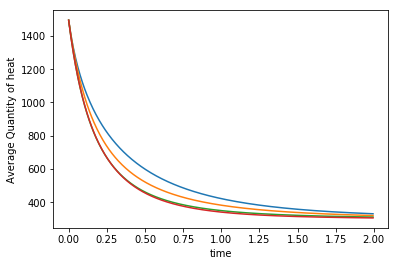

In [3]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA
from heapq import nlargest
from operator import itemgetter
import matplotlib.pyplot as plt

fh=open("graph-exponent-2.dat", 'rb')
G1=nx.read_edgelist(fh)
fh.close()

fh=open("graph-exponent-2.3.dat", 'rb')
G2=nx.read_edgelist(fh)
fh.close()

fh=open("graph-exponent-2.7.dat", 'rb')
G3=nx.read_edgelist(fh)
fh.close()

fh=open("graph-exponent-3.0.dat", 'rb')
G4=nx.read_edgelist(fh)
fh.close()

x=0
t_vals =[]
tot_vals=[]
time=2.0
G_lst = [G1,G2,G3, G4]
for G in G_lst:
    n = len(G.nodes())
    dd = nx.degree_centrality(G)
    degmax= dict(nlargest(200,dd.items(), key=itemgetter(1)))
    phi_0 = [0]*n
    keylist = list(map(int, degmax.keys()))
    i=0
    for key in keylist:
        phi_0[key]=500+i
        i=i+10

    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    for t in np.arange(0,time,0.005):               #Loop through times and decay each initial component
        Phi   = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi   = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()
        t_vals.append(np.mean([phi_t[index] for index in keylist]))
    tot_vals.append(t_vals) 
    t_vals=[]
    
for tt in tot_vals:
    plt.plot(np.arange(0,time,0.005),tt)
plt.xlabel('time')
plt.ylabel('Average Quantity of heat')
#plt.title('Diffusion of heat over networks with different exponent values at x=0')
#plt.legend(['lambda= '+str(lb) for lb in [2.0,2.3,2.7,3.0]])
plt.show()

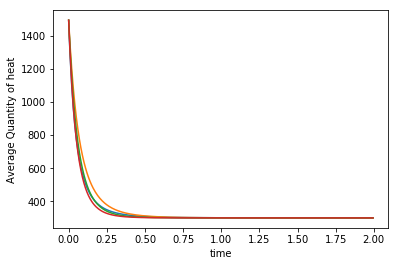

In [5]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA
from heapq import nlargest
from operator import itemgetter
import matplotlib.pyplot as plt

fh=open("graph-exponent-2.dat", 'rb')
G1=nx.read_edgelist(fh)
fh.close()

fh=open("graph-exponent-2.3.dat", 'rb')
G2=nx.read_edgelist(fh)
fh.close()

fh=open("graph-exponent-2.7.dat", 'rb')
G3=nx.read_edgelist(fh)
fh.close()

fh=open("graph-exponent-3.0.dat", 'rb')
G4=nx.read_edgelist(fh)
fh.close()

x=0.1
t_vals =[]
tot_vals=[]
time=2.0
G_lst = [G1,G2, G3, G4]
for G in G_lst:
    n = len(G.nodes())
    dd = nx.degree_centrality(G)
    degmax= dict(nlargest(200,dd.items(), key=itemgetter(1)))
    phi_0 = [0]*n
    keylist = list(map(int, degmax.keys()))
    i=0
    for key in keylist:
        phi_0[key]=500+i
        i=i+10

    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    for t in np.arange(0,time,0.005):               #Loop through times and decay each initial component
        Phi   = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi   = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()
        t_vals.append(np.mean([phi_t[index] for index in keylist]))
    tot_vals.append(t_vals) 
    t_vals=[]
    
for tt in tot_vals:
    plt.plot(np.arange(0,time,0.005),tt)
plt.xlabel('time')
plt.ylabel('Average Quantity of heat')
#plt.title('Diffusion of heat over networks with different exponent values at x=0.1')
#plt.legend(['lambda= '+str(lb) for lb in [2.0,2.3,2.7,3.0]])
plt.show()

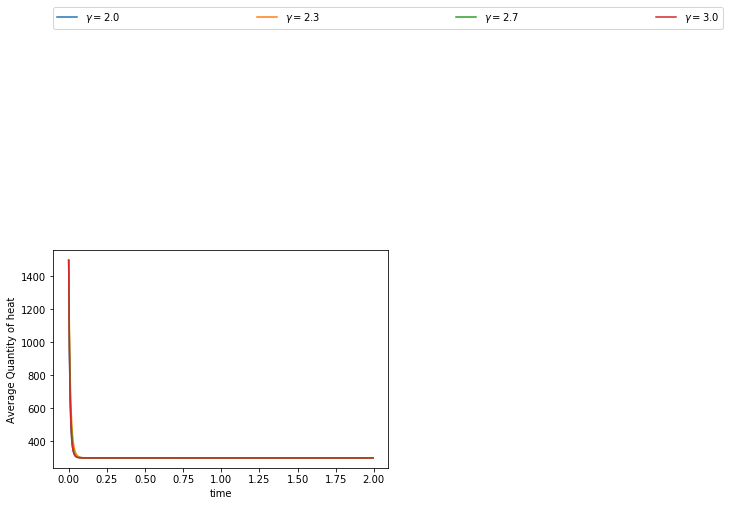

In [10]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA
from heapq import nlargest
from operator import itemgetter
import matplotlib.pyplot as plt

fh=open("graph-exponent-2.dat", 'rb')
G1=nx.read_edgelist(fh)
fh.close()

fh=open("graph-exponent-2.3.dat", 'rb')
G2=nx.read_edgelist(fh)
fh.close()

fh=open("graph-exponent-2.7.dat", 'rb')
G3=nx.read_edgelist(fh)
fh.close()

fh=open("graph-exponent-3.0.dat", 'rb')
G4=nx.read_edgelist(fh)
fh.close()

x=0.3
t_vals =[]
tot_vals=[]
time=2.0
G_lst = [G1,G2, G3, G4]
for G in G_lst:
    n = len(G.nodes())
    dd = nx.degree_centrality(G)
    degmax= dict(nlargest(200,dd.items(), key=itemgetter(1)))
    phi_0 = [0]*n
    keylist = list(map(int, degmax.keys()))
    i=0
    for key in keylist:
        phi_0[key]=500+i
        i=i+10

    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    for t in np.arange(0,time,0.005):               #Loop through times and decay each initial component
        Phi   = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi   = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()
        t_vals.append(np.mean([phi_t[index] for index in keylist]))
    tot_vals.append(t_vals) 
    t_vals=[]
    
for tt in tot_vals:
    plt.plot(np.arange(0,time,0.005),tt)
plt.xlabel('time')
plt.ylabel('Average Quantity of heat')
#plt.title('Diffusion of heat over networks with different exponent values at x=0.3')
leg = [r"$\gamma = $" +str(lb) for lb in [2.0,2.3,2.7,3.0]]
plt.legend(leg,bbox_to_anchor=(0., 2.02, 2., .202), loc=3,
           ncol=10, mode="expand", borderaxespad=0.)
plt.show()

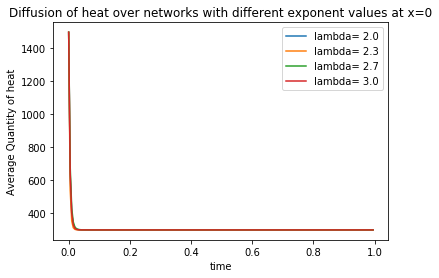

In [11]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA
from heapq import nlargest
from operator import itemgetter
import matplotlib.pyplot as plt

fh=open("graph-exponent-2.dat", 'rb')
G1=nx.read_edgelist(fh)
fh.close()

fh=open("graph-exponent-2.3.dat", 'rb')
G2=nx.read_edgelist(fh)
fh.close()

fh=open("graph-exponent-2.7.dat", 'rb')
G3=nx.read_edgelist(fh)
fh.close()

fh=open("graph-exponent-3.0.dat", 'rb')
G4=nx.read_edgelist(fh)
fh.close()

x=0.4
t_vals =[]
tot_vals=[]
time=1.0
G_lst = [G1,G2, G3, G4]
for G in G_lst:
    n = len(G.nodes())
    dd = nx.degree_centrality(G)
    degmax= dict(nlargest(200,dd.items(), key=itemgetter(1)))
    phi_0 = [0]*n
    keylist = list(map(int, degmax.keys()))
    i=0
    for key in keylist:
        phi_0[key]=500+i
        i=i+10

    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    for t in np.arange(0,time,0.005):               #Loop through times and decay each initial component
        Phi   = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi   = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()
        t_vals.append(np.mean([phi_t[index] for index in keylist]))
    tot_vals.append(t_vals) 
    t_vals=[]
    
for tt in tot_vals:
    plt.plot(np.arange(0,time,0.005),tt)
plt.xlabel('time')
plt.ylabel('Average Quantity of heat')
plt.title('Diffusion of heat over networks with different exponent values at x=0')
plt.legend(['lambda= '+str(lb) for lb in [2.0,2.3,2.7,3.0]])
plt.show()

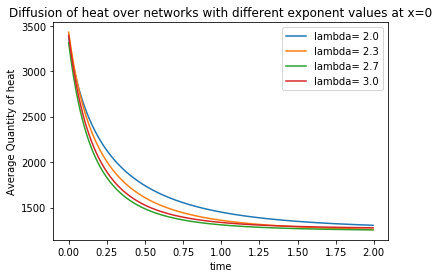

In [6]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA
from heapq import nlargest
from operator import itemgetter
import matplotlib.pyplot as plt

fh=open("graph-exponent-2.dat", 'rb')
G1=nx.read_edgelist(fh)
fh.close()

fh=open("graph-exponent-2.3.dat", 'rb')
G2=nx.read_edgelist(fh)
fh.close()

fh=open("graph-exponent-2.7.dat", 'rb')
G3=nx.read_edgelist(fh)
fh.close()

fh=open("graph-exponent-3.0.dat", 'rb')
G4=nx.read_edgelist(fh)
fh.close()

x=0
t_vals =[]
tot_vals=[]
time=2.0
G_lst = [G1,G2,G3, G4]
for G in G_lst:
    n = len(G.nodes())
    #dd = nx.degree_centrality(G)
    #degmax= dict(nlargest(200,dd.items(), key=itemgetter(1)))
    keylist = list(map(int,np.random.choice(G.nodes(),500)))
    phi_0 = [0]*n
    #keylist = list(map(int, degmax.keys()))
    i=0
    for key in keylist:
        phi_0[key]=500+i
        i=i+10

    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    for t in np.arange(0,time,0.005):               #Loop through times and decay each initial component
        Phi   = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi   = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()
        t_vals.append(np.mean([phi_t[index] for index in keylist]))
    tot_vals.append(t_vals) 
    t_vals=[]
    
for tt in tot_vals:
    plt.plot(np.arange(0,time,0.005),tt)
plt.xlabel('time')
plt.ylabel('Average Quantity of heat')
plt.title('Diffusion of heat over networks with different exponent values at x=0')
plt.legend(['lambda= '+str(lb) for lb in [2.0,2.3,2.7,3.0]])
plt.show() 

In [9]:
#for larger networks
import numpy as np
import networkx as nx
from scipy import linalg as LA
from heapq import nlargest
from operator import itemgetter
import matplotlib.pyplot as plt

fh=open("graph-exponent-2.dat", 'rb')
G1=nx.read_edgelist(fh)
fh.close()

fh=open("graph-exponent-2.3.dat", 'rb')
G2=nx.read_edgelist(fh)
fh.close()

fh=open("graph-exponent-2.7.dat", 'rb')
G3=nx.read_edgelist(fh)
fh.close()

fh=open("graph-exponent-3.0.dat", 'rb')
G4=nx.read_edgelist(fh)
fh.close()

x=0.1
t_vals =[]
tot_vals=[]
time=2.0
G_lst = [G1,G2,G3, G4]
for G in G_lst:
    n = len(G.nodes())
    #dd = nx.degree_centrality(G)
    #degmax= dict(nlargest(200,dd.items(), key=itemgetter(1)))
    keylist = list(map(int,np.random.choice(G.nodes(),500)))
    phi_0 = [0]*n
    #keylist = list(map(int, degmax.keys()))
    i=0
    for key in keylist:
        phi_0[key]=500+i
        i=i+10

    L =  genlaplacian(G,x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) 
    for t in np.arange(0,time,0.005):               #Loop through times and decay each initial component
        Phi   = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi   = np.dot(V,Phi);               
        phi_t = (Phi.ravel()).tolist()
        t_vals.append(np.mean([phi_t[index] for index in keylist]))
    tot_vals.append(t_vals) 
    t_vals=[]
    
for tt in tot_vals:
    plt.plot(np.arange(0,time,0.005),tt)
plt.xlabel('time')
plt.ylabel('Average Quantity of heat')
plt.title('Diffusion of heat over networks with different exponent values at x=0')
plt.legend(['lambda= '+str(lb) for lb in [2.0,2.3,2.7,3.0]])
plt.show() 

IndexError: list assignment index out of range